In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from matplotlib import pyplot as plt
import numpy as np

#**Load Data**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive") 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train = '/content/gdrive/MyDrive/ds/Fruit/Train'
val = '/content/gdrive/MyDrive/ds/Fruit/Val'

In [ ]:
# Generate dataset from image files in the directory
train = tf.keras.utils.image_dataset_from_directory(train)
train

Found 3446 files belonging to 15 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
val = tf.keras.utils.image_dataset_from_directory(val)
val

Found 1716 files belonging to 15 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
c = train.class_names
c

['apple_braeburn_1',
 'apple_golden_1',
 'apple_granny_smith_1',
 'apple_pink_lady_1',
 'apple_red_1',
 'apple_red_delicios_1',
 'apple_rotten_1',
 'cabbage_white_1',
 'carrot_1',
 'cucumber_1',
 'eggplant_violet_1',
 'pear_1',
 'pear_2',
 'zucchini_1',
 'zucchini_dark_1']

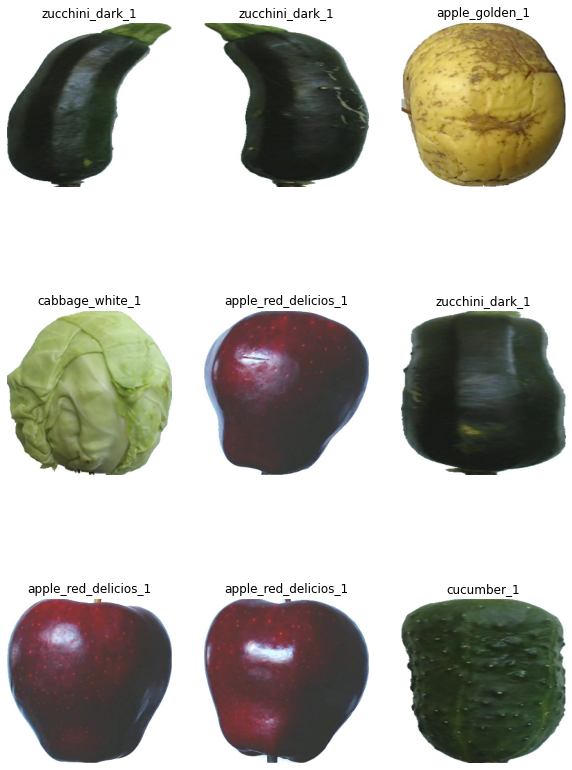

In [ ]:
plt.figure(figsize=(10, 15))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train.class_names[labels[i]])
    plt.axis("off")

#**Data Preprocessing**

In [ ]:
from sklearn import preprocessing

# encode labels(classes)
le = preprocessing.LabelEncoder()
train_classes = le.fit_transform(train.class_names)

train_classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
# convert labels to a vector
train_classes = tf.keras.utils.to_categorical(train_classes)
train_classes

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [ ]:
train_size = int(len(train))
val_size = int(len(val))

train = train.take(train_size)
val = val.take(val_size)

In [ ]:
# Building ResNet50 model
from tensorflow.keras.applications import EfficientNetB3

backbone = EfficientNetB3(
    input_shape = (256,256, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.build()
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 8, 8, 1536)       10783535  
                                                                 
 global_average_pooling2d_21  (None, 1536)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_21 (Dropout)        (None, 1536)              0         
                                                                 
 dense_52 (Dense)            (None, 128)               196736    
                                                                 
 dense_53 (Dense)            (None, 131)               16899     
                                                                 
Total params: 10,997,170
Trainable params: 10,909,867
Non-trainable params: 87,303
____________________________________

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
f = model.fit(
    train,
    steps_per_epoch = len(train)//32,
    validation_data = val,
    validation_steps = len(val)//32,
    epochs = 35,
    batch_size = 32
)

Epoch 1/35
3/3 [==============================] - 78s 3s/step - loss: 4.5358 - accuracy: 0.1875 - val_loss: 4.6040 - val_accuracy: 0.1250
Epoch 2/35
3/3 [==============================] - 3s 1s/step - loss: 2.8398 - accuracy: 0.7292 - val_loss: 3.9050 - val_accuracy: 0.3125
Epoch 3/35
3/3 [==============================] - 3s 1s/step - loss: 1.2155 - accuracy: 0.9479 - val_loss: 2.8228 - val_accuracy: 0.4062
Epoch 4/35
3/3 [==============================] - 3s 1s/step - loss: 0.8593 - accuracy: 0.8438 - val_loss: 2.8187 - val_accuracy: 0.4375
Epoch 5/35
3/3 [==============================] - 3s 1s/step - loss: 0.1806 - accuracy: 0.9688 - val_loss: 2.9036 - val_accuracy: 0.5938
Epoch 6/35
3/3 [==============================] - 3s 1s/step - loss: 0.1225 - accuracy: 0.9792 - val_loss: 2.1572 - val_accuracy: 0.5938
Epoch 7/35
3/3 [==============================] - 3s 1s/step - loss: 0.1533 - accuracy: 0.9688 - val_loss: 1.2775 - val_accuracy: 0.6875
Epoch 8/35
3/3 [========================

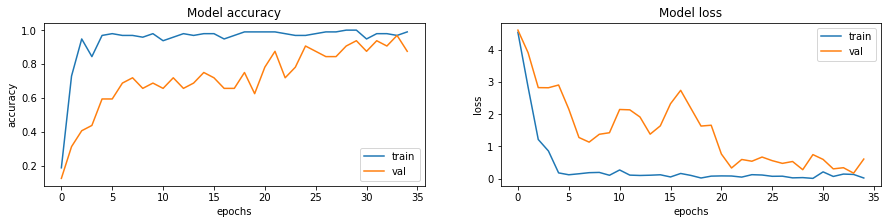

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 3))
ax = ax.ravel()

for i,met in enumerate(['accuracy', 'loss']):
  ax[i].plot(f.history[met])
  ax[i].plot(f.history['val_' + met])
  ax[i].set_title('Model {}'.format(met))
  ax[i].set_xlabel('epochs')
  ax[i].set_ylabel(met)
  ax[i].legend(['train', 'val'])